***Predict if a patient has Chronic Kidney Disease***

This notebook is to do an exploratory data analysis (EDA) on the data following the CRISP-DM framework.

**Business Understanding**

**Goal**: Identify key variables that predict if a patient has Chronic Kidney Disease (CKD) (Diagnosis).

**Data Understanding:**

- Load the data and display the first few rows.
- Show dataset shape, data types, and summary statistics.
- Check missing values.

**Data Preparation:**

- Handle missing values and data types.
- Drop unnecessary columns (e.g., DoctorInCharge as you mentioned before).
- Encode categorical variables if needed.

**EDA:**

- Target Distribution: Check class balance of Diagnosis.
- Feature Distributions: Visualize distributions for numerical and categorical variables.
- Correlation Matrix: Show relationships between variables.
- Boxplots/Violin plots: Compare feature distributions between CKD and non-CKD.
- Key Findings: Initial insights.

Load and preview the data 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/kidney_disease.csv')

# Show shape, columns, and first few rows
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nFirst 5 Rows:\n", df.head())

# Data types and missing values
print("\nData Types:\n", df.dtypes)

Shape: (400, 26)

Columns:
 ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

First 5 Rows:
    id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ... 

In [5]:
#Lets rename the columns to meaningfull name 
# Column renaming dictionary
rename_dict = {
    'id': 'id',
    'age': 'Age',
    'bp': 'Blood_Pressure',
    'sg': 'Specific_Gravity',
    'al': 'Albumin',
    'su': 'Sugar',
    'rbc': 'Red_Blood_Cells',
    'pc': 'Pus_Cells',
    'pcc': 'Pus_Cell_Clumps',
    'ba': 'Bacteria',
    'bgr': 'Blood_Glucose_Random',
    'bu': 'Blood_Urea',
    'sc': 'Serum_Creatinine',
    'sod': 'Sodium',
    'pot': 'Potassium',
    'hemo': 'Hemoglobin',
    'pcv': 'Packed_Cell_Volume',
    'wc': 'White_Blood_Cell_Count',
    'rc': 'Red_Blood_Cell_Count',
    'htn': 'Hypertension',
    'dm': 'Diabetes_Mellitus',
    'cad': 'Coronary_Artery_Disease',
    'appet': 'Appetite',
    'pe': 'Pedal_Edema',
    'ane': 'Anemia',
    'classification': 'CKD'
}

# Rename columns
df = df.rename(columns=rename_dict)

# Preview renamed columns
print(df.columns)

Index(['id', 'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
       'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria',
       'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
       'Potassium', 'Hemoglobin', 'Packed_Cell_Volume',
       'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension',
       'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite',
       'Pedal_Edema', 'Anemia', 'CKD'],
      dtype='object')


In [6]:
print("\nData Types:\n", df.dtypes)



Data Types:
 id                           int64
Age                        float64
Blood_Pressure             float64
Specific_Gravity           float64
Albumin                    float64
Sugar                      float64
Red_Blood_Cells             object
Pus_Cells                   object
Pus_Cell_Clumps             object
Bacteria                    object
Blood_Glucose_Random       float64
Blood_Urea                 float64
Serum_Creatinine           float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed_Cell_Volume          object
White_Blood_Cell_Count      object
Red_Blood_Cell_Count        object
Hypertension                object
Diabetes_Mellitus           object
Coronary_Artery_Disease     object
Appetite                    object
Pedal_Edema                 object
Anemia                      object
CKD                         object
dtype: object


Let's see the distribution of missing data 

In [8]:
# Convert the binary values to numerical

binary_cols = [
    'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease',
    'Pedal_Edema', 'Anemia', 'Appetite', 'CKD', 'Red_Blood_Cells',
    'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria'
]


for col in binary_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")
        

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()

binary_map = {
    'yes': 1,
    ' yes': 1,
    '\tno': 0,
    '\tyes': 1,
    'no': 0,
    'good': 1,
    'poor': 0,
    'ckd': 1,
    'ckd\t': 1,
    'notckd': 0,
    'normal': 0,
    'abnormal': 1,
    'notpresent': 0,
    'present': 1
    
}

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map(binary_map)

for col in binary_cols:
    if col in df.columns:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].astype(int)

print(df.info())


for col in binary_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

Hypertension: ['yes' 'no' nan]
Diabetes_Mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
Coronary_Artery_Disease: ['no' 'yes' '\tno' nan]
Pedal_Edema: ['no' 'yes' nan]
Anemia: ['no' 'yes' nan]
Appetite: ['good' 'poor' nan]
CKD: ['ckd' 'ckd\t' 'notckd']
Red_Blood_Cells: [nan 'normal' 'abnormal']
Pus_Cells: ['normal' 'abnormal' nan]
Pus_Cell_Clumps: ['notpresent' 'present' nan]
Bacteria: ['notpresent' 'present' nan]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   Age                      391 non-null    float64
 2   Blood_Pressure           388 non-null    float64
 3   Specific_Gravity         353 non-null    float64
 4   Albumin                  354 non-null    float64
 5   Sugar                    351 non-null    float64
 6   Red_Blood_Cells          400 non-null   

In [9]:
import pandas as pd

# Count of missing values per column
missing_count = df.isnull().sum()

# Percentage of missing values per column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Combine into a summary DataFrame
missing_summary = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent.round(2)
}).sort_values(by='missing_count', ascending=False)

print(missing_summary)


                         missing_count  missing_percent
Red_Blood_Cell_Count               130            32.50
White_Blood_Cell_Count             105            26.25
Potassium                           88            22.00
Sodium                              87            21.75
Packed_Cell_Volume                  70            17.50
Hemoglobin                          52            13.00
Sugar                               49            12.25
Specific_Gravity                    47            11.75
Albumin                             46            11.50
Blood_Glucose_Random                44            11.00
Blood_Urea                          19             4.75
Serum_Creatinine                    17             4.25
Blood_Pressure                      12             3.00
Age                                  9             2.25
Anemia                               0             0.00
Pedal_Edema                          0             0.00
Appetite                             0          

| Column Name                    | Missing (Count, %) | Type        | Clinical Value                                         | Action                                 |
|------------------------------- |--------------------|-------------|--------------------------------------------------------|----------------------------------------|
| Red Blood Cells                | 152 (38%)          | Categorical | Indicates blood cell abnormality, relevant for CKD     | Drop (due to high missingness)         |
| Red Blood Cell Count           | 130 (32.5%)        | Numeric     | Highly relevant, but large gaps                        | Drop (due to high missingness)         |
| White Blood Cell Count         | 105 (26%)          | Numeric     | Infection/inflammation, somewhat related               | Drop (due to high missingness)         |
| Sodium                   | 87 (21.8%)         | Numeric     | Important for kidney function                          | Impute with median                     |
| Potassium                | 88 (22%)           | Numeric     | Key for kidney health                                  | Impute with median                     |
| Hemoglobin                     | 52 (13%)           | Numeric     | Relevant for CKD                                       | Impute with median                     |
| Packed Cell Volume             | 70 (17.5%)         | Numeric     | Related to anemia/CKD                                  | Convert to numeric, impute with median |
| Specific Gravity               | 47 (11.8%)         | Numeric     | Urine chemistry, relevant for CKD                      | Impute with median                     |
| Albumin                        | 46 (11.5%)         | Numeric     | Urine chemistry, relevant for CKD                      | Impute with median                     |
| Sugar                          | 49 (12.3%)         | Numeric     | Urine chemistry, relevant for CKD                      | Impute with median                     |
| Blood Glucose Random           | 44 (11%)           | Numeric     | Blood chemistry, relevant for CKD                      | Impute with median                     |
| Blood Urea                     | 19 (4.8%)          | Numeric     | Blood urea, relevant for CKD                           | Impute with median                     |
| Serum Creatinine               | 17 (4.3%)          | Numeric     | Serum creatinine, relevant for CKD                     | Impute with median                     |
| Hypertension, Diabetes Mellitus, Coronary Artery Disease, Appetite, Pedal Edema, Anemia, CKD Stage | 0–2 (<1%) | Categorical | Clinical indicators/target                   | Impute with mode                       |


Lets goahead and clean up the data 

In [12]:
 df = df.drop(columns=['id', 'Red_Blood_Cells', 'Red_Blood_Cell_Count', 'White_Blood_Cell_Count'])

# Make sure the Packed Cell Volume has all numerical values 
print(f"pcv: {df['Packed_Cell_Volume'].unique()}")
df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].astype(str).str.strip()
# Replace '?' or any non-numeric with NaN
df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].replace({'?': None, '\\t?': None})
df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].replace({'nan': None})
# For values like '\t43', just strip again and try conversion
df['Packed_Cell_Volume'] = df['Packed_Cell_Volume'].str.replace(r'[^0-9.]', '', regex=True)

print(f"pcv: {df['Packed_Cell_Volume'].unique()}")


#  Impute numeric columns with their median
impute_cols = ['Age', 'Blood_Pressure', 'Specific_Gravity', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed_Cell_Volume', 'Sugar', 'Albumin', 'Sugar', 'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine']



# Convert 'Packed_Cell_Volume' to numeric if not already
df['Packed_Cell_Volume'] = pd.to_numeric(df['Packed_Cell_Volume'], errors='coerce')

for col in impute_cols:
    if col in df.columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

# Optional: Verify that imputation worked
print(df[impute_cols].isnull().sum())

# Reset index and preview cleaned data
df = df.reset_index(drop=True)


print(df.info())
print(df.head())

pcv: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
pcv: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' None '16' '24' '37'
 '30' '34' '40' '45' '27' '48' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
Age                     0
Blood_Pressure          0
Specific_Gravity        0
Sodium                  0
Potassium               0
Hemoglobin              0
Packed_Cell_Volume      0
Sugar                   0
Albumin                 0
Sugar                   0
Blood_Glucose_Random    0
Blood_Urea              0
Serum_Creatinine        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   -

In [13]:
numeric_cols = [
    'Age',
    'Blood_Pressure',
    'Specific_Gravity',
    'Albumin',
    'Sugar',
    'Blood_Glucose_Random',
    'Blood_Urea',
    'Serum_Creatinine',
    'Sodium',
    'Potassium',
    'Hemoglobin',
    'Packed_Cell_Volume',
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood_Pressure           400 non-null    float64
 2   Specific_Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Pus_Cells                400 non-null    int64  
 6   Pus_Cell_Clumps          400 non-null    int64  
 7   Bacteria                 400 non-null    int64  
 8   Blood_Glucose_Random     400 non-null    float64
 9   Blood_Urea               400 non-null    float64
 10  Serum_Creatinine         400 non-null    float64
 11  Sodium                   400 non-null    float64
 12  Potassium                400 non-null    float64
 13  Hemoglobin               400 non-null    float64
 14  Packed_Cell_Volume       4

## **Feature Engineering** 
No new features engineered in this module; all variables are clinically meaningful as provided.

Now we have the data cleaned up, lets Visualize the data

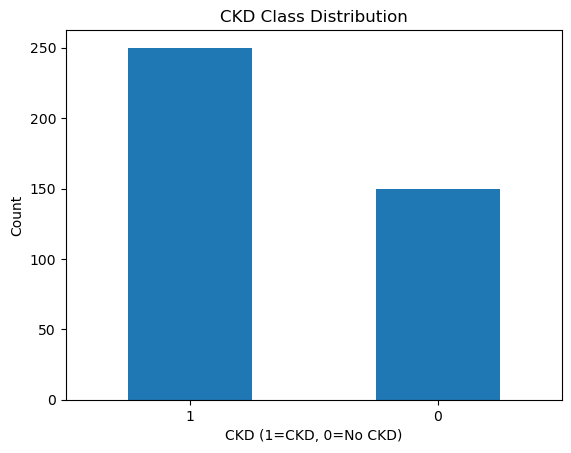

In [15]:
# Visualize the Target Distribution

df['CKD'].value_counts().plot(kind='bar')
plt.title('CKD Class Distribution')
plt.xlabel('CKD (1=CKD, 0=No CKD)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Findings:** There are more patients with CKD (class 1) than without (class 0).
The data is **not perfectly balanced (not 50/50)**, but the imbalance is moderate (about 62% CKD, 38% non-CKD).



Histogram of all numerical values

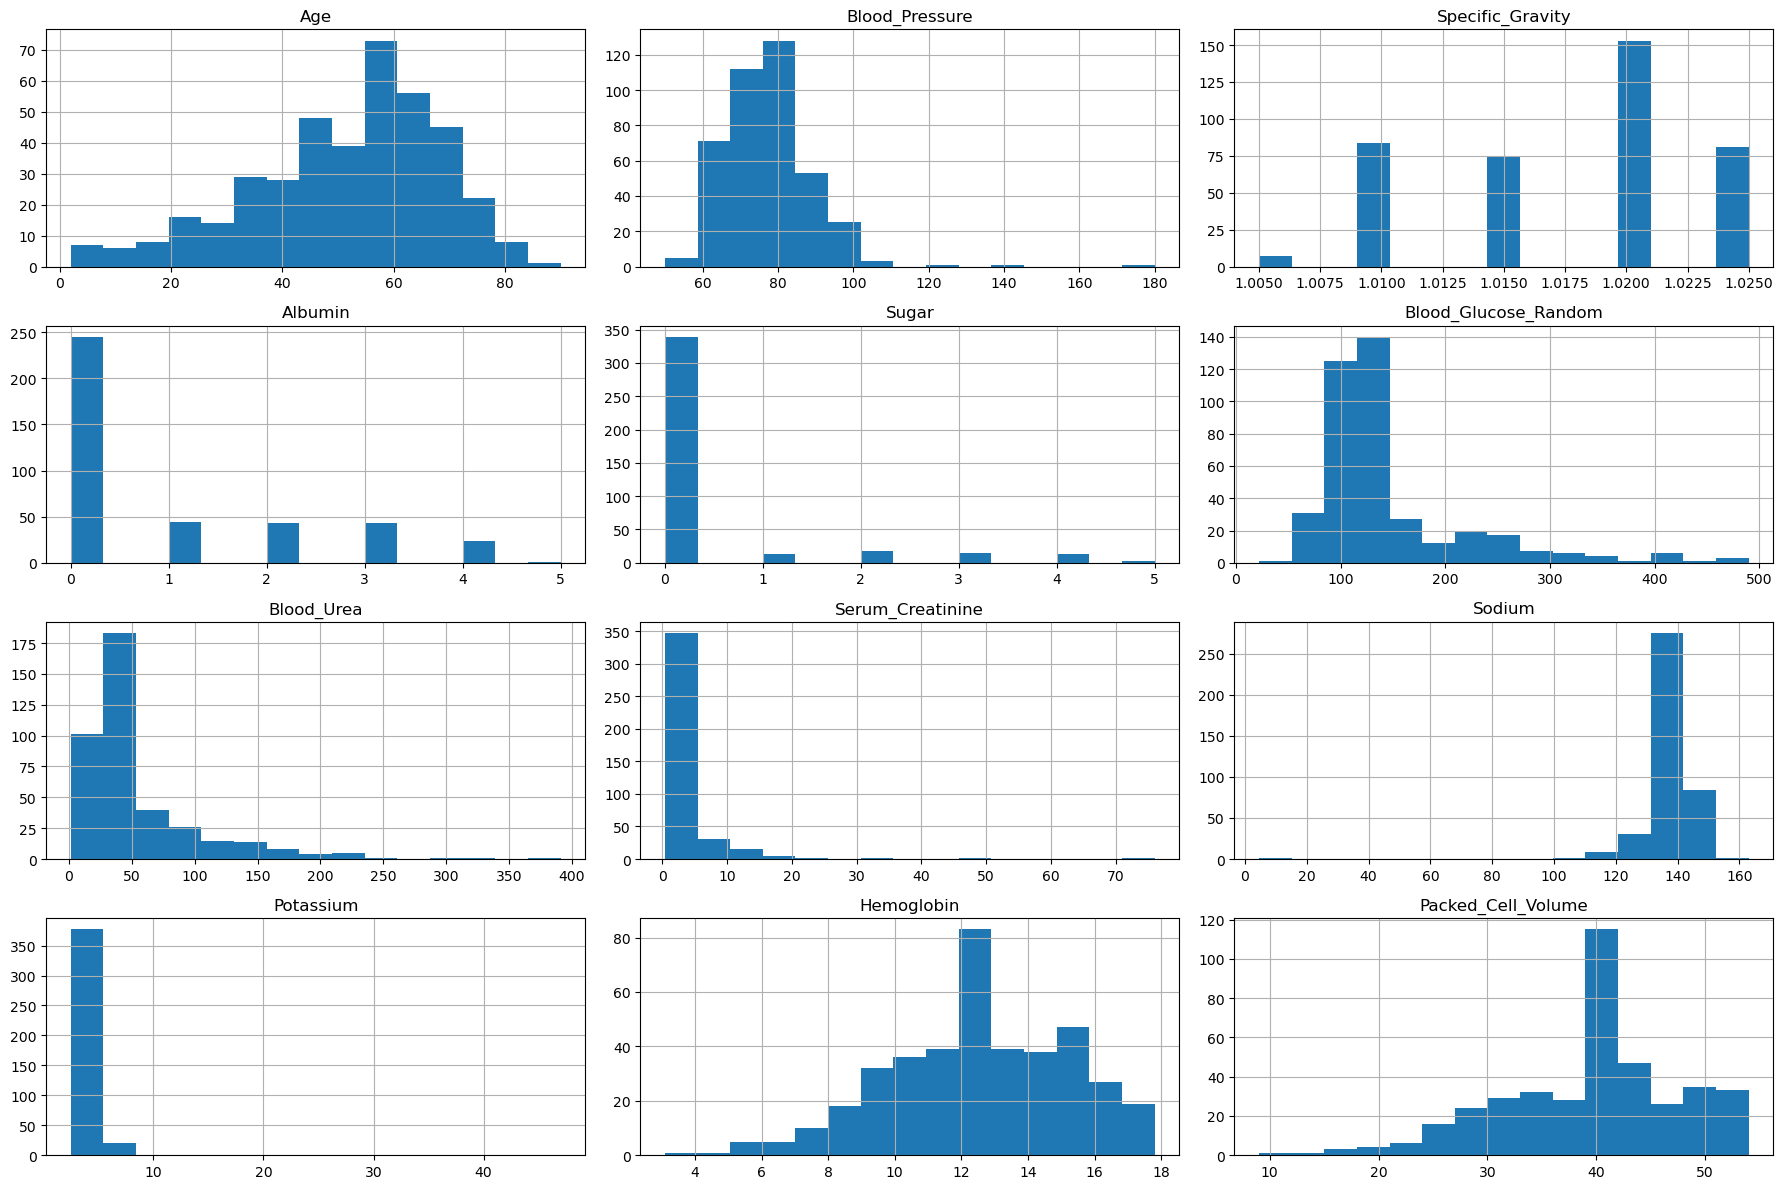

In [18]:
numeric_cols = [
    'Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar',
    'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium',
    'Potassium', 'Hemoglobin', 'Packed_Cell_Volume'
]

df[numeric_cols].hist(figsize=(18, 12), bins=15, layout=(4, 3))
plt.tight_layout()
plt.show()

**Skewed Distributions:** Many features (e.g., Blood Urea, Serum Creatinine, Sugar, Albumin) have a strong right or left skew, with a majority of patients having “normal” results and a tail of patients with high/abnormal results (likely CKD patients).

**Discrete/Nearly Categorical:** Features like Specific Gravity and Albumin only take on a few distinct values.

**Outliers:** Several variables (Blood Glucose Random, Blood Urea, Serum Creatinine) have clear outliers, which may be biologically plausible but should be considered in modeling.

Bar Plots for binary data

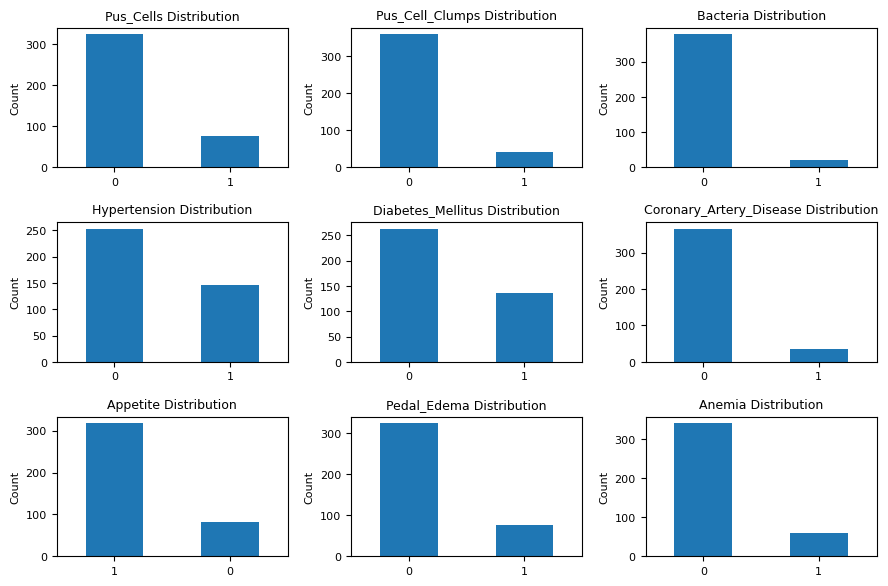

In [21]:
binary_cols = [
    'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria', 'Hypertension', 'Diabetes_Mellitus',
    'Coronary_Artery_Disease', 'Appetite', 'Pedal_Edema', 'Anemia'
]

n_cols = 3
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 6))

for idx, col in enumerate(binary_cols):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{col} Distribution', fontsize=9)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=8)
    ax.tick_params(axis='x', labelrotation=0, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# Hide any unused axes if you have fewer columns than grid slots
for idx in range(len(binary_cols), n_rows*n_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout(pad=1.2)
plt.show()


* **Most patients have “normal” values** for most binary clinical features
  (e.g., normal pus cells, no bacteria, no pedal edema, no anemia, good appetite).

* **A smaller proportion have “abnormal” or disease-related findings**
  (e.g., presence of pus cell clumps, bacteria, pedal edema, anemia, or poor appetite).

* **Hypertension and diabetes are present in a notable minority (\~40%)**,
  which aligns with their known association with CKD risk.

* **Coronary artery disease and abnormal urinary findings are less common**
  in this population.

**Feature Vs Target**

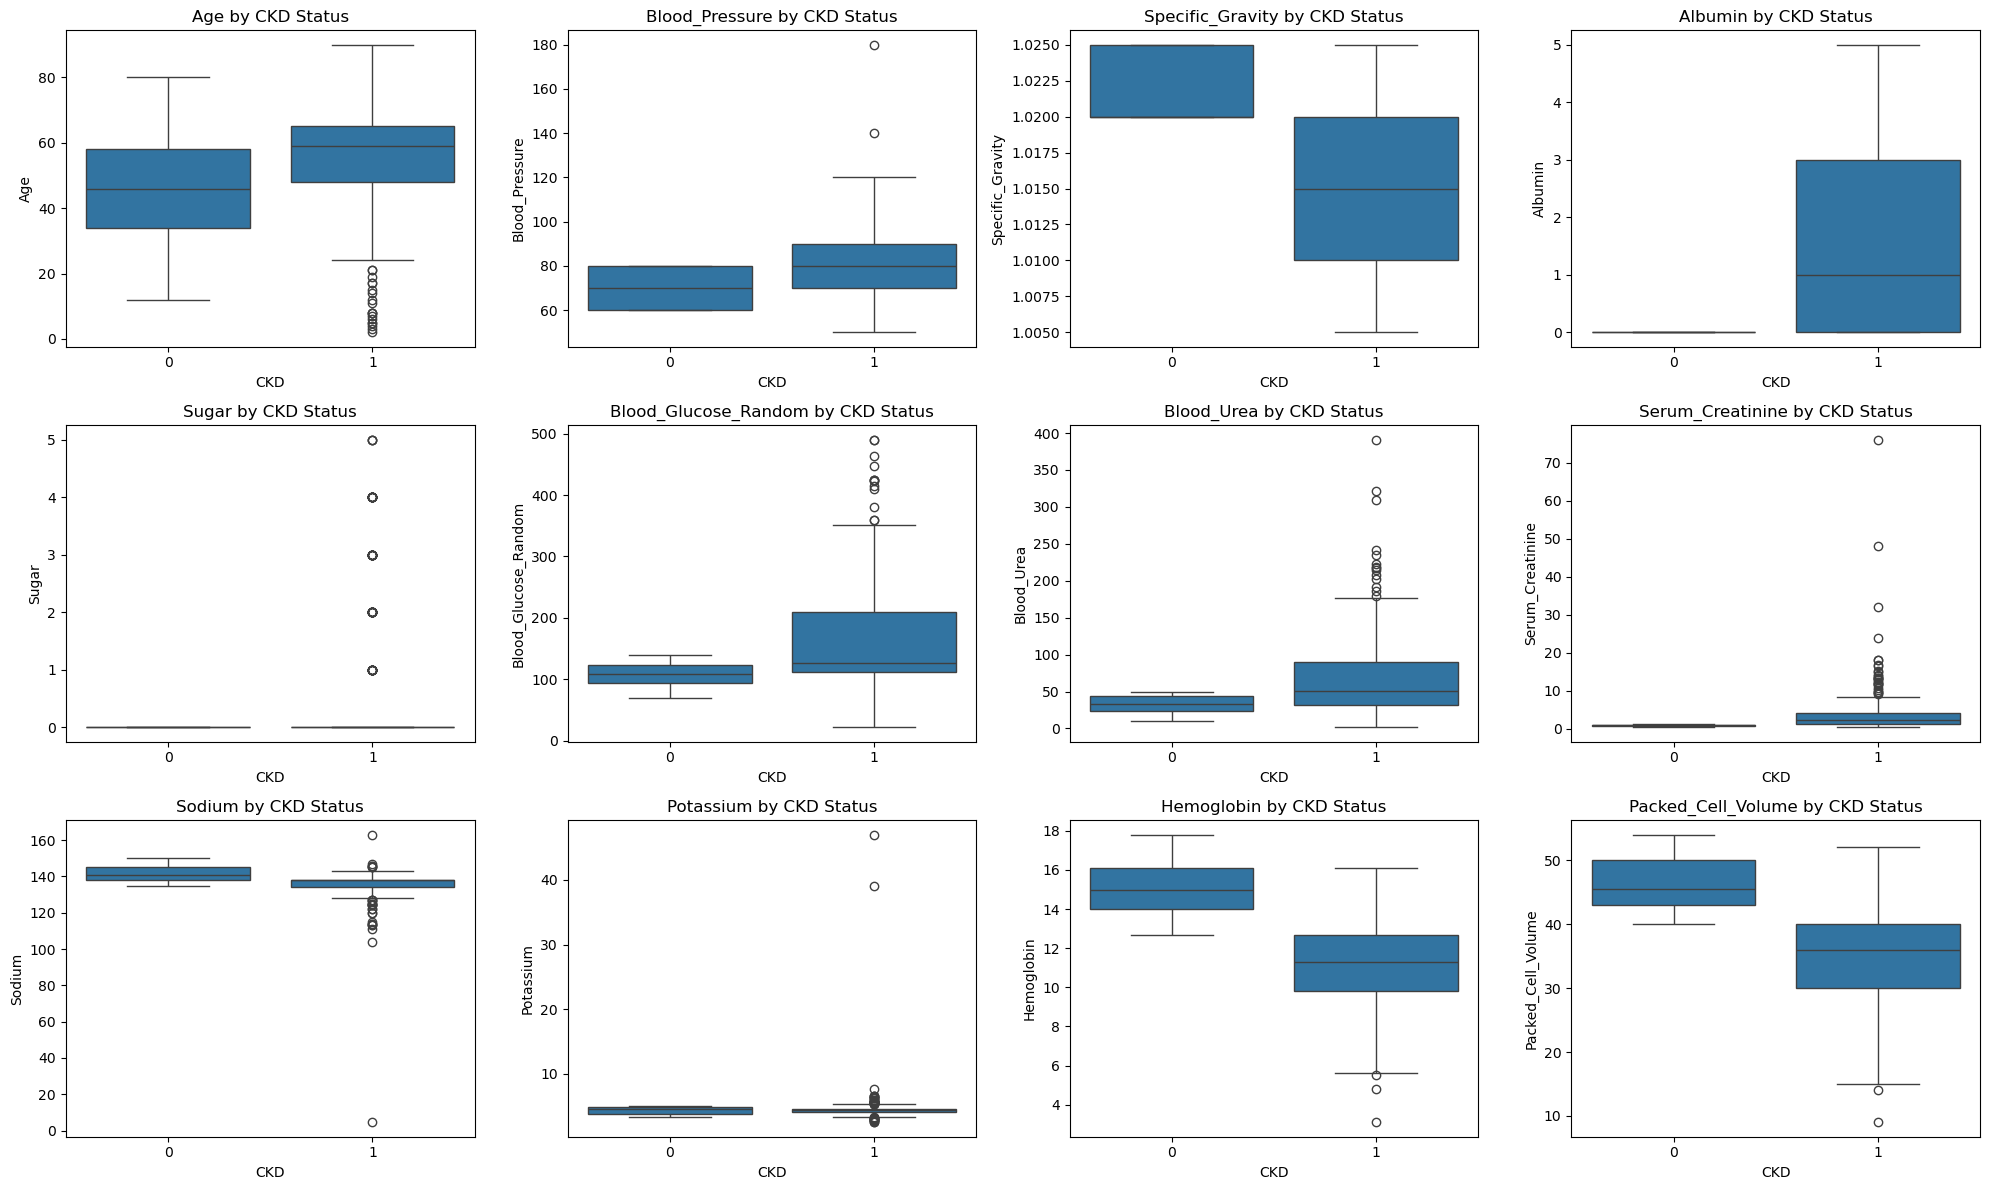

In [24]:
import seaborn as sns

import math

# Example: 12 numeric columns in 3 rows x 4 columns grid
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

for idx, col in enumerate(numeric_cols):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    sns.boxplot(x='CKD', y=col, data=df, ax=ax)
    ax.set_title(f'{col} by CKD Status')
    ax.set_xlabel('CKD')
    ax.set_ylabel(col)

# Hide any empty subplots if the number of columns doesn't fill the grid
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

## Key Feature Insights (What This Visual Shows)

* **Age**
  * Patients with CKD (`CKD=1`) tend to be **older on average** than those without.

* **Blood Pressure**
  * Median blood pressure is **higher** in the CKD group.
  * CKD patients have a **wider spread and more outliers**.

* **Specific Gravity**
  * **Lower** in CKD patients, indicating **reduced urine concentrating ability** in CKD.

* **Albumin**
  * **Much higher** in the CKD group; almost all non-CKD patients have 0, while CKD patients have a wide range up to 4–5.
  * Indicates **proteinuria is a strong CKD signal**.

* **Sugar**
  * Median is 0 in both, but CKD group has more **extreme high outliers**.

* **Blood Glucose Random**
  * **Higher median** in CKD; wide spread for CKD patients with many high outliers.

* **Blood Urea**
  * **Dramatically higher** in the CKD group, with lots of outliers.
  * Urea rises when kidney function is impaired.

* **Serum Creatinine**
  * **Much higher** in the CKD group, with extreme outliers.
  * Key marker of CKD.

* **Sodium**
  * **Slightly lower and more variable** in CKD group, but overlap is high.

* **Potassium**
  * More outliers (high potassium) in CKD, though most values are low in both groups.

* **Hemoglobin**
  * **Lower** in CKD group; CKD is associated with anemia.

* **Packed Cell Volume**
  * **Lower** in CKD group, consistent with more anemia.

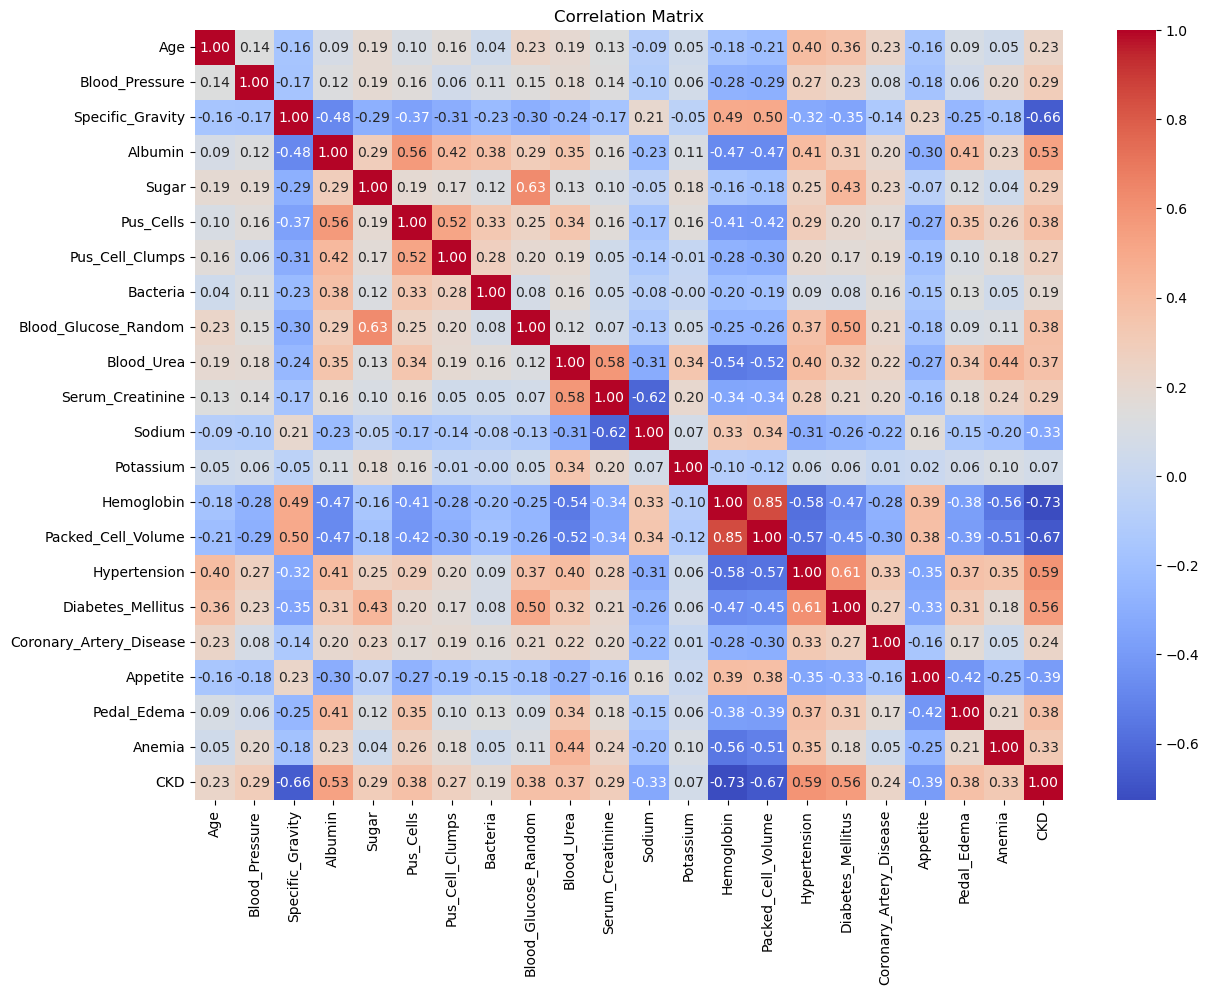

In [26]:
corr = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Correlation Matrix Heatmap Interpretation

This is a **correlation matrix heatmap** showing how each feature in our CKD dataset relates to every other feature, including the target `CKD`.

**Color scale:**

* **Red (positive):** Features increase together
* **Blue (negative):** One increases as the other decreases
* **White (near zero):** Little or no linear relationship

## How to Interpret

### Diagonal

* The diagonal is always **1.00** (each feature is perfectly correlated with itself).

---

### Key Relationships with CKD (last row/column)

| Feature              | Correlation with CKD | Interpretation                                         |
| -------------------- | -------------------- | ------------------------------------------------------ |
| Hemoglobin           | -0.73                | **Strong negative:** Lower hemoglobin is linked to CKD |
| Packed\_Cell\_Volume | -0.67                | **Strong negative:** Lower PCV is linked to CKD        |
| Specific\_Gravity    | -0.53                | **Negative:** Lower urine concentrating ability in CKD |
| Albumin              | 0.53                 | **Strong positive:** Higher urine albumin in CKD       |
| Serum\_Creatinine    | 0.59                 | **Strong positive:** Higher creatinine in CKD          |
| Blood\_Urea          | 0.37                 | **Moderate positive:** Higher urea in CKD              |
| Hypertension         | 0.40                 | **Moderate positive:** More hypertension in CKD        |
| Diabetes\_Mellitus   | 0.56                 | **Strong positive:** Diabetes common in CKD            |
| Appetite             | -0.39                | **Negative:** Poor appetite in CKD                     |
| Pedal\_Edema         | 0.33                 | **Positive:** Edema more common in CKD                 |
| Anemia               | 0.33                 | **Positive:** Anemia more common in CKD                |
| Age                  | 0.23                 | **Weak positive:** CKD more common with age            |

---

### Notable Feature-Feature Relationships

* **Hemoglobin & Packed\_Cell\_Volume:** Very strong positive correlation (**0.85**)
  (Makes sense: both are measures of red cell health.)
* **Specific\_Gravity & Albumin:** Strong negative correlation (**-0.47**)
  (Loss of urine concentration ability often comes with albuminuria in CKD.)
* **Hypertension & Diabetes Mellitus:** Moderate correlation (**0.61**)
  (These conditions often co-exist.)

---

### What Do These Patterns Tells us?

* **Most predictive features for CKD:**
  * Low hemoglobin, low packed cell volume, high serum creatinine, high albumin, diabetes, hypertension

* **Redundant features:**
  * If two features are very highly correlated (e.g., Hemoglobin and Packed Cell Volume), you might only need one for modeling.

* **Weakly correlated features:**
  * Features with correlation close to zero (e.g., Sodium, Potassium) are less predictive for CKD.

---

## Summary Table

| Strongest CKD Predictors                           | Correlation Significance |
| -------------------------------------------------- | ------------------------ |
| Hemoglobin, Packed\_Cell\_Volume                   | Strong negative          |
| Albumin, Serum\_Creatinine, Diabetes, Hypertension | Strong positive          |

| Moderate Predictors                                |                          |
| -------------------------------------------------- | ------------------------ |
| Blood Urea, Appetite, Pedal Edema, Anemia, Age     | Moderate                 |

| Weak/Redundant Features                            |                          |
| -------------------------------------------------- | ------------------------ |
| Sodium, Potassium, Bacteria                        | Weak                     |

---

## Clinical Insight

* These relationships align with CKD pathophysiology:

  * **CKD causes anemia (low hemoglobin/PCV), high creatinine/urea, and proteinuria (high albumin).**
  * CKD is **more common in patients with diabetes, hypertension, and poor appetite.**


# Building a Baseline CKD Prediction Model (Based on Correlation Matrix)

## 1. **Feature Selection (Based on Correlation Matrix)**

Select features that are **strongly correlated** with CKD (|correlation| > \~0.3) for a robust, interpretable baseline model:

* **Hemoglobin**
* **Packed\_Cell\_Volume**
* **Serum\_Creatinine**
* **Albumin**
* **Diabetes\_Mellitus**
* **Hypertension**
* **Specific\_Gravity**
* **Blood\_Urea**
* **Appetite**
* **Pedal\_Edema**
* **Anemia**
* **Age**

> *This subset balances predictive power and model interpretability.*

---

## 2. **Prepare Data**

In [29]:
# Select features and target
feature_cols = [
    'Hemoglobin', 'Packed_Cell_Volume', 'Serum_Creatinine', 'Albumin',
    'Diabetes_Mellitus', 'Hypertension', 'Specific_Gravity', 'Blood_Urea',
    'Appetite', 'Pedal_Edema', 'Anemia', 'Age'
]

X = df[feature_cols]
y = df['CKD']  # Target column


## 3. **Train-Test Split**

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 4. **Build Baseline Model (Logistic Regression)**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate and fit the model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

## 5. **Evaluate the Model**

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92        30
           1       0.98      0.92      0.95        50

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80


Confusion Matrix:
 [[29  1]
 [ 4 46]]


## 6. ** View Feature Coefficients**
 To interpret which features are most influential:

In [37]:
coefficients = pd.Series(clf.coef_[0], index=feature_cols)
print(coefficients.sort_values(ascending=False))

Diabetes_Mellitus     1.962374
Albumin               1.628746
Hypertension          1.336727
Serum_Creatinine      1.336282
Pedal_Edema           0.506507
Anemia                0.264998
Age                   0.005284
Blood_Urea           -0.023743
Specific_Gravity     -0.050685
Packed_Cell_Volume   -0.281618
Appetite             -0.837722
Hemoglobin           -1.058909
dtype: float64


## **Summary**

* **Selected features** using correlation analysis.
* **Logistic regression** as a strong, interpretable baseline.
* **Stratified train-test split** preserves class balance.
* **Comprehensive evaluation** (accuracy, precision, recall, F1-score).

## ** Next Steps **
In module 24, I will refine feature selection, test additional ML models, and make the notebook presentation-ready for both technical and non-technical audiences